In [4]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikeras


In [5]:
import tensorflow as tf
print(tf.__version__)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


2.18.0


In [6]:
# Dados da tabela
X1 = np.array([
    ['sol',     'quente', 'elevada', 'fraco'],
    ['sol',     'quente', 'elevada', 'forte'],
    ['nuvens',  'quente', 'elevada', 'fraco'],
    ['chuva',   'ameno',  'elevada', 'fraco'],
    ['chuva',   'fresco', 'normal',  'fraco'],
    ['chuva',   'fresco', 'normal',  'forte'],
    ['nuvens',  'fresco', 'normal',  'fraco'],
    ['sol',     'ameno',  'elevada', 'fraco'],
    ['sol',     'fresco', 'normal',  'fraco'],
    ['chuva',   'ameno',  'normal',  'forte'],
    ['sol',     'ameno',  'normal',  'forte'],
    ['nuvens',  'ameno',  'elevada', 'forte'],
    ['nuvens',  'quente', 'normal',  'fraco'],
    ['chuva',   'ameno',  'elevada', 'forte']
])

Y = np.array([
    'não joga', 'não joga', 'joga', 'joga', 'joga', 'não joga', 'joga',
    'joga', 'joga', 'joga', 'joga', 'joga', 'joga', 'não joga'
])

# Codificação manual
for i in range(len(X1)):
  if X1[i][0] == "chuva":
    X1[i][0] = 0
  elif X1[i][0] == "nuvens":
    X1[i][0] = 1
  elif X1[i][0] == "sol":
    X1[i][0] = 2

  if X1[i][1] == "fresco":
    X1[i][1] = 0
  elif X1[i][1] == "ameno":
    X1[i][1] = 1
  elif X1[i][1] == "quente":
    X1[i][1] = 2

  if X1[i][2] == "normal":
    X1[i][2] = 0
  elif X1[i][2] == "elevada":
    X1[i][2] = 1

  if X1[i][3] == "fraco":
    X1[i][3] = 0
  elif X1[i][3] == "forte":
    X1[i][3] = 1

X = pd.DataFrame(X1, dtype=str, columns=['Aspecto', 'Temperatura', 'Umidade', 'Vento'])
Y = pd.DataFrame(Y, dtype=str, columns=['Classe'])

X


,Aspecto,Temperatura,Umidade,Vento
0,2,2,1,0
1,2,2,1,1
2,1,2,1,0
3,0,1,1,0
4,0,0,0,0
5,0,0,0,1
6,1,0,0,0
7,2,1,1,0
8,2,0,0,0
9,0,1,0,1


In [7]:
arvore = DecisionTreeClassifier(criterion='entropy', max_depth=3)
arvore = arvore.fit(X, Y)


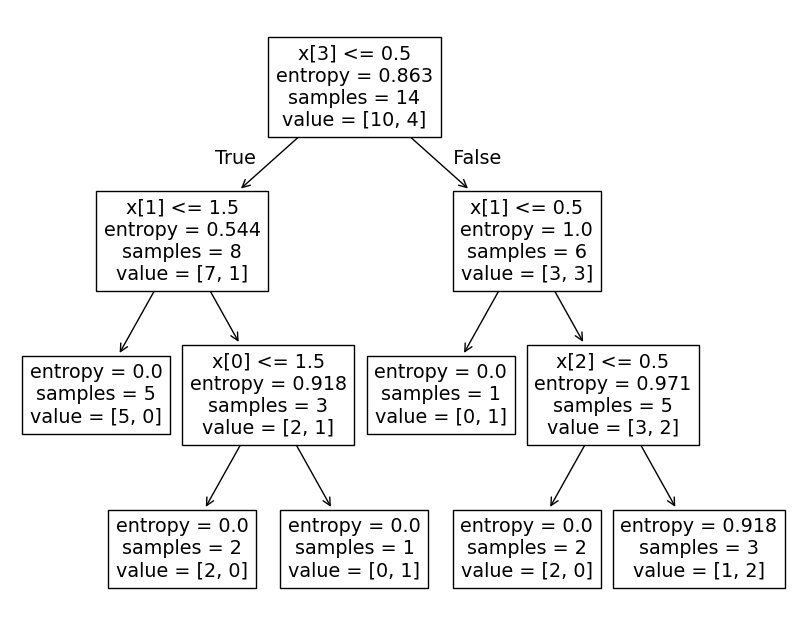

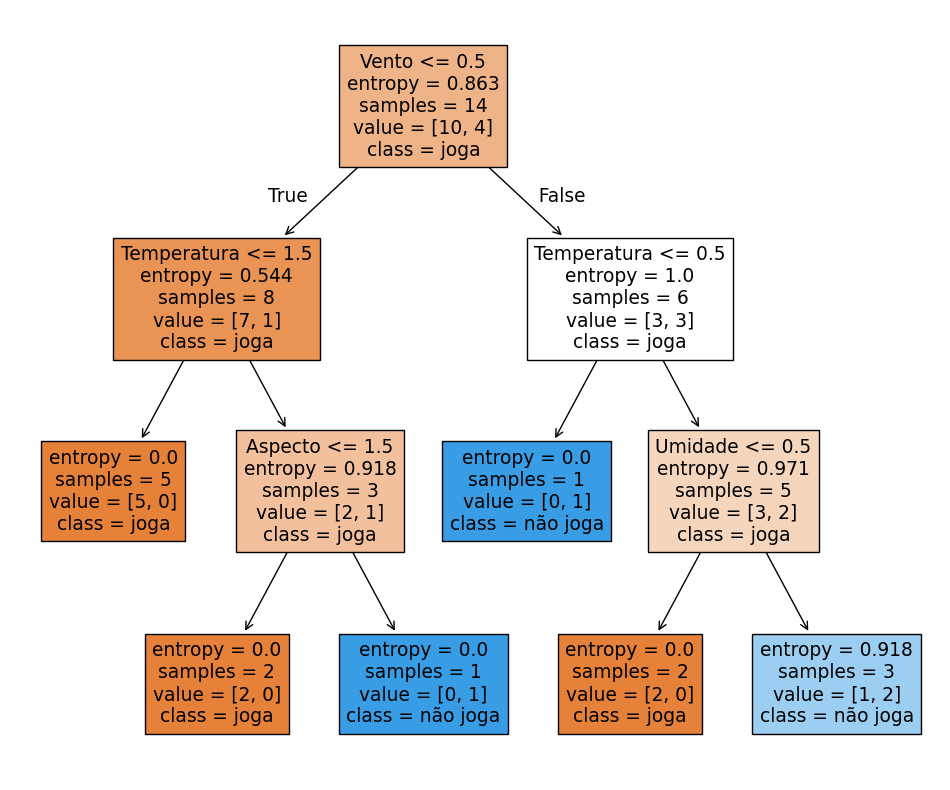

In [8]:
# Gráfico simples
fig, ax = plt.subplots(figsize=(10,8))
plot_tree(arvore)

# Gráfico com nomes
previsores = ['Aspecto', 'Temperatura', 'Umidade', 'Vento']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
plot_tree(arvore, feature_names=previsores, class_names=arvore.classes_, filled=True)
plt.show()


In [9]:
regras = export_text(arvore, feature_names=previsores)
print(regras)


|--- Vento <= 0.50
|   |--- Temperatura <= 1.50
|   |   |--- class: joga
|   |--- Temperatura >  1.50
|   |   |--- Aspecto <= 1.50
|   |   |   |--- class: joga
|   |   |--- Aspecto >  1.50
|   |   |   |--- class: não joga
|--- Vento >  0.50
|   |--- Temperatura <= 0.50
|   |   |--- class: não joga
|   |--- Temperatura >  0.50
|   |   |--- Umidade <= 0.50
|   |   |   |--- class: joga
|   |   |--- Umidade >  0.50
|   |   |   |--- class: não joga



In [10]:
entrada1 = pd.DataFrame([['2', '1', '0', '1']], columns=['Aspecto', 'Temperatura', 'Umidade', 'Vento'])
print("Resultado:", arvore.predict(entrada1)[0])


Resultado: joga


In [11]:
entrada2 = pd.DataFrame([['0', '2', '0', '0']], columns=['Aspecto', 'Temperatura', 'Umidade', 'Vento'])
print("Resultado:", arvore.predict(entrada2)[0])


Resultado: joga
